# 1.1 Teorema de Bayes


### Frecuente vs Bayesiano
La diferencia esencial entre la inferencia frecuentista y la inferencia bayesiana es la misma que la diferencia entre las dos interpretaciones de lo que significa una "probabilidad".

La inferencia frecuente es un método de inferencia estadística en el que se obtienen conclusiones de los datos haciendo hincapié en la frecuencia o proporción de los datos.

La inferencia bayesiana es un método de inferencia estadística en el que el teorema de Bayes se usa para actualizar la probabilidad de una hipótesis a medida que hay más evidencia o información disponible.

### La probabilidad condicional
Sea A y B dos eventos, entonces la probabilidad condicional de A dado B se define como la relación:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Observación: formalmente tenemos un espacio de probabilidad $(\Omega,F,P)$, donde $\Omega$ es el espacio muestral, F
 es un $\sigma$-algebra en $\Omega$ y P es una medida de probabilidad. Los eventos A y B son elementos de F y asumimos que
$P(B) \neq 0$.

Observar en particular

$$P(A|B)P(B)=P(A \cap B) =P(B \cap A) = P(B|A) P(A)$$


### Teorema de Bayes

De la última fórmula obtenemos la relación

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

el cual es conocido como el teorema de Bayes

### Enfoque bayesiano para el análisis de datos


Suponga que tiene una muestra de observaciones $y_1,...,y_n$ de una variable aleatoria $Y \sim f(y|\theta)$, donde $\theta$ es un parametro para la distribución. Aqui tambien consideramos a $\theta$ como una variables aleatoria. Siguiendo el Teorema de Bayes (su versión continua) podemos escribir:

$$f(\theta|y) = \frac{f(y|\theta)f(\theta)}{f(y)} = \frac{f(y|\theta)f(\theta)}{\int f(y|\theta)f(\theta) \partial \theta}$$

- La funcion $f(y|\theta)$ es llamada "likelihood".
- $f(\theta)$ es la distribucion prior de $\theta$.

Note que $f(y)$ no depende de $\theta$ (solo de la data), por lo tanto, puede considerarse como una "constante de normalización". Además, a menudo ocurre que la integral anterior no es fácil de calcular. Sin embargo, es suficiente considerar la relación:

$$f(\theta|y) \propto likelihood \times prior.$$

(Aqui $\propto$ detona la relacion de proporcionalidad)



# Ejemplo: datos de Poisson

Para tener una mejor idea de la relación anterior, vamos a estudiar un ejemplo concreto. Considerar $n$ muestras de
$Y \sim Poiss(\lambda)$. Recuerde que la distribución de Poisson viene dada por:

$$f(y_i|\lambda) = \frac{e^{-\lambda}\lambda^{y_i}}{y_i!}$$

donde $\lambda > 0$. Es fácil verificar que el valor esperado y la varianza sean $E(Y) = \lambda$ y $Var(Y)=\lambda$ respectivamente. Paralelamente a la discusión formal, vamos a implementar una simulación numérica:

In [84]:
import numpy as np
import scipy.stats as ss

# We set a seed so that the results are reproducible.
np.random.seed(5)

# number of samples.
n = 100

# true parameter.
lam_true = 2

# sample array.
y = np.random.poisson(lam=lam_true, size=n)

y

array([2, 4, 1, 0, 2, 2, 2, 2, 1, 1, 3, 2, 0, 1, 3, 3, 4, 2, 0, 0, 3, 6,
       1, 2, 1, 2, 5, 2, 3, 0, 1, 3, 1, 4, 1, 2, 4, 0, 6, 4, 1, 2, 2, 0,
       1, 2, 4, 4, 1, 3, 0, 3, 3, 2, 4, 2, 2, 1, 1, 2, 5, 2, 3, 0, 1, 1,
       1, 3, 4, 1, 3, 4, 2, 1, 2, 4, 2, 2, 1, 0, 2, 2, 3, 0, 3, 3, 4, 2,
       2, 1, 2, 1, 3, 0, 1, 0, 3, 3, 1, 2])

Estimador $\bar{λ} = \frac{\displaystyle \sum_{i=1}^ny_i}{n}$

In [88]:
# mean of the sample. 
y.mean()

2.06

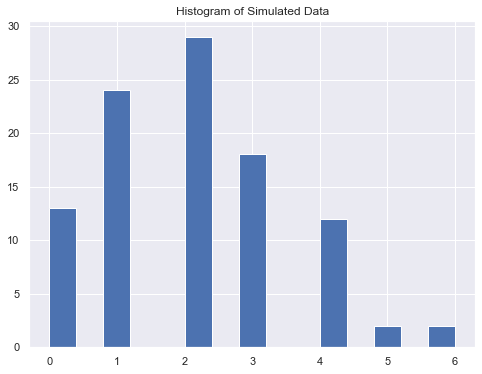

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# Histogram of the sample.
plt.figure(figsize=(8, 6))
plt.hist(y, bins=15)
plt.title('Histogram of Simulated Data');

# Prior: distribución gamma

Consideremos una distribución gamma previa para el parámetro $\lambda \sim \Gamma(a,b)$ Recuerde que la función de densidad para la distribución gamma es:

$$f_{\Lambda}(\lambda) = \frac{b^a}{\Gamma(a)}\lambda^{a-1}e^{-b\lambda}$$

donde $a>0$ es el parámetro de "shape" y $b > 0$ es el parámetro de "rate". Uno verifica que:

$E(\lambda) = \frac{a}{b}$
y
$Var(\lambda) = \frac{a}{b^2}$

Tracemos una distribución gamma para parámetros a=3.5 y b=2.

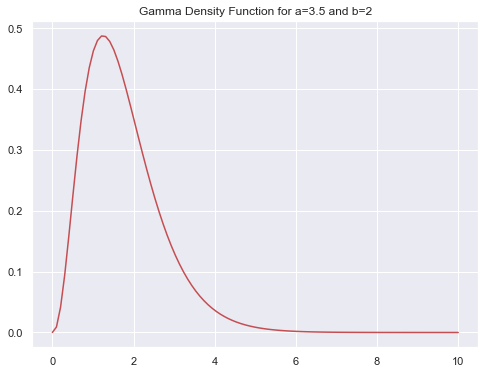

In [89]:
# Parameters of the prior gamma distribution.
a = 3.5 # shape
b = 2 # rate = 1/scale

x = np.linspace(start=0, stop=10, num=100)

plt.figure(figsize=(8, 6))
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.title('Gamma Density Function for a={} and b={}'.format(a,b))

# Define the prior distribution. https://realpython.com/python-lambda/
prior = lambda x: ss.gamma.pdf(x, a=a, scale=1/b)

# Likelihood

Como las observaciones son independientes, la función de probabilidad es:

$$f(y|\lambda) = \prod_{i=1}^n \frac{e^{-\lambda}\lambda^{y_i}}{y_i!} =  \frac{e^{-n\lambda}\lambda^{\displaystyle \sum_{i=1}^ny_i}}{\displaystyle \prod_{i=1}^n y_i!}$$

In [90]:
import scipy.special as sp

# Define the likelihood function.
def likelihood(lam,y):
    
    factorials = np.apply_along_axis(
        lambda x: sp.gamma(x+1),
        axis=0,
        arr=y
    )
    
    numerator = np.exp(-lam*y.size)*(lam**y.sum())
    
    denominator = np.multiply.reduce(factorials)
    
    return numerator/denominator  

# Posterior: Distribución para $\lambda$

Como solo estamos interesados en la estructura de la distribución posterior, hasta una constante, vemos

$$f(\lambda|y) \propto likelihood \times  prior$$
$$\propto f(y|\lambda)f(\lambda)$$
$$\propto  e^{-n\lambda}\lambda^{\sum_{i=1}^ny_i}\lambda^{a-1}e^{-b\lambda}$$
$$\propto  \lambda^{(\sum_{i=1}^n y_i + a) -1}e^{-(n+b)\lambda}$$


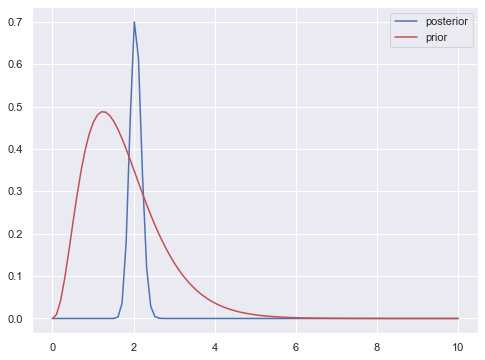

In [91]:
# Define the posterior distribution.
# (up to a constant)
def posterior_up_to_constant(lam,y):
    return likelihood(lam,y)*prior(lam)

# Plot of the prior and (scaled) posterior distribution
# for the parameter lambda.
#
# We multiply the posterior distrubution function
# by the amplitude factor 2.5e74 to make it comparable
# with the prior gamma distribution.
plt.figure(figsize=(8, 6))
plt.plot(x, 2.0e74*posterior_up_to_constant(x,y), label='posterior')
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-', label='prior')
plt.legend();

# Distribución posterior verdadera para $\lambda$

De hecho, como $f(\lambda|y) \propto \lambda^{(\sum_{i=1}^n y_i + a) -1}e^{-(n+b)\lambda}$, uno verifica que la distribucion posterior es de nuevo una gamma:

$$f(\lambda|y) = \Gamma(\sum_{i=1}^n y_i + a,n+b)$$

Esto significac que la distribucion gamma y poisson forman un par congujado.

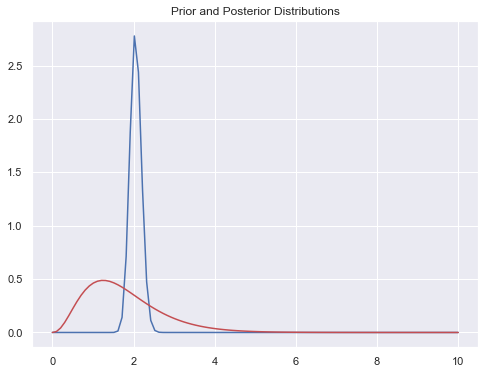

In [92]:
def posterior(lam,y):
    
    shape = a + y.sum()
    rate = b + y.size
    
    return ss.gamma.pdf(lam, shape, scale=1/rate)

plt.figure(figsize=(8, 6))
plt.plot(x, posterior(x,y))
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.title('Prior and Posterior Distributions');

De hecho, vemos cómo la distribución posterior se concentra alrededor del parámetro verdadero $\lambda = 2$.

Note que la media posterior es:

$$\frac{\sum_{i=1}^ny_i +a}{n+b}=\frac{b}{n+b}\frac{a}{b} + \frac{n}{n+b}\frac{\sum_{i=1}^ny_i}{n}$$

Esto es, un promedio ponderado de la media anterior $a/b$ y el promedio muestral $\bar{y}$. A medida que aumenta n,

$$\lim_{n\rightarrow +\infty} \frac{b}{n+b}\frac{a}{b} + \frac{n}{n+b}\frac{\sum_{i=1}^ny_i}{n}=\bar{y}$$

In [94]:
# Posterior gamma parameters.
shape = a + y.sum()
rate = b + y.size

# Posterior mean.
shape/rate

# pagina de referencia
# https://juanitorduz.github.io/intro_pymc3/

2.053921568627451

# Intervalo de confianza

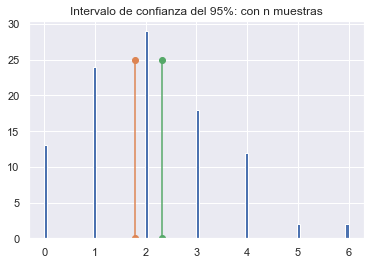

In [95]:
import numpy as np
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

s = y

plt.figure()
_ = plt.hist(s,  bins=100)

sigma2 = y.var()
mean = y.mean()
#ci = scipy.stats.norm.interval(0.95, loc=mean, scale=sigma)
#print(f'los límies del CI de 95% para la normal con media {mean} y varianza {sigma**2} son: {ci}')

# cnfidence interval left line
one_x12, one_y12 = [y.mean() - 1.96*np.sqrt(sigma2)/np.sqrt(n),y.mean() - 1.96*np.sqrt(sigma2)/np.sqrt(n)], [0, n/4]
# cnfidence interval right line
two_x12, two_y12 = [y.mean() + 1.96*np.sqrt(sigma2)/np.sqrt(n),y.mean() + 1.96*np.sqrt(sigma2)/np.sqrt(n)], [0, n/4]

plt.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o');
plt.title('Intervalo de confianza del 95%: con n muestras')
plt.show()

In [96]:
abs(one_x12[0]-two_x12[0])

0.5426616713938808

In [97]:
one_x12

[1.7886691643030597, 1.7886691643030597]

In [98]:
two_x12

[2.3313308356969404, 2.3313308356969404]

In [99]:
ss.norm.interval(0.95, loc=np.mean(y), scale=ss.sem(y))

(1.787307260563846, 2.332692739436154)

# PyMC3 Syntax

Ahora realizamos una simulación MCMC para los datos descritos anteriormente. Tenga en cuenta lo fácil que es escribir el modelo a partir de la descripción matemática.

In [63]:
import os
os.environ["MKL_THREADING_LAYER"] = "GNU"

In [64]:
import pymc3 as pm

model = pm.Model()

with model:
    
    # Define the prior of the parameter lambda.
    lam = pm.Gamma('lambda', alpha=a, beta=b)
    
    # Define the likelihood function.
    y_obs = pm.Poisson('y_obs', mu=lam, observed=y)
    
    # Consider 2000 draws and 3 chains.
    trace = pm.sample(draws=2000, chains=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [lambda]
Sampling 3 chains, 0 divergences: 100%|█| 7500/7500 [00:05<00:00, 1388.33draws/
The acceptance probability does not match the target. It is 0.8904961765053746, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8819318193976328, but should be close to 0.8. Try to increase the number of tuning steps.


Si hacemos un trazado de traza podemos ver dos resultados:

1. Vemos la distribución posterior simulada para 3 cadenas de Markov independientes (de modo que, cuando se combinan, evitan la dependencia del punto inicial). Las 3 cadenas diferentes corresponden al color azul, verde y naranja.

2. El valor de muestra de lambda para cada iteración.

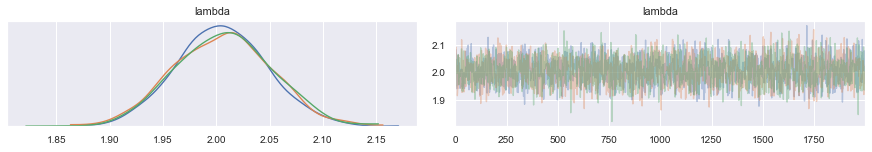

In [65]:
pm.plot_trace(trace);

También podemos ver la información media y cuantil para la distribución posterior.

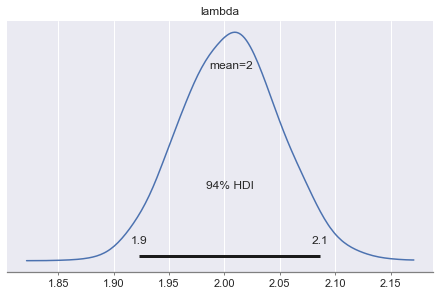

In [66]:
pm.plot_posterior(trace);

# Veamos algunos ejemplos:

### El problema de la moneda
Los problemas de monedas son clásicos cuando hablamos de probabilidad y estadística, nos permiten ejemplificar conceptos abstractos de forma simple. Asimismo, pueden ser muchas veces conceptualmente similares a situaciones reales, de hecho cualquier problema en donde obtengamos resultados binarios, 0/1, enfermo/sano, spam/no-spam, puede ser pensado como si estuviéramos hablando de monedas. En este caso, la idea es utilizar un modelo bayesiano para inferir si la moneda se encuentra sesgada o no.

Para este ejemplo, vamos a utilizar una distribución binomial como likelihood y una distribución beta como a priori. Veamos como lo podemos modelar con PyMC3.

In [67]:
import os
os.environ["MKL_THREADING_LAYER"] = "GNU"

# importando modulos necesarios
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.random.seed(1984) #replicar random

%matplotlib inline

In [68]:
# El problema de la moneda
# de 100 lanzamientos 80 caras
n = 100
caras = 80# Creación del modelo
niter = 2000
with pm.Model() as modelo_moneda:
    # a priori
    p = pm.Beta('p', alpha=2, beta=2)
    # likelihood
    y = pm.Binomial('y', n=n, p=p, observed=caras)

In [69]:
# Realizando el muestreo para la inferencia
with modelo_moneda:
    trace = pm.sample(niter)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains, 0 divergences: 100%|█| 10000/10000 [00:06<00:00, 1460.22draw


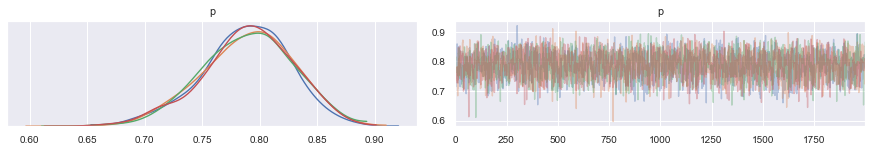

In [70]:
# Analizando los resultados
pm.plot_trace(trace, var_names=['p'])
pass

In [71]:
# Información resumen. 
#Vemos que hay un 95% de probabilidades de que el valor de sesgo este entre
# .71 y .86
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p,0.788,0.039,0.714,0.862,0.001,0.0,3403.0,3377.0,3361.0,5205.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4FCB93BE0>],
      dtype=object)

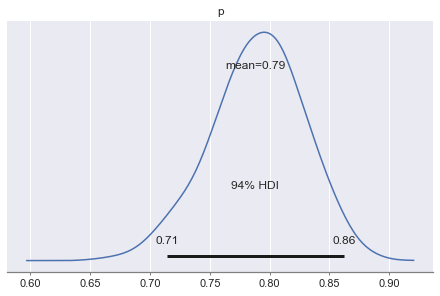

In [72]:
pm.plot_posterior(trace)

# Referencias:

1. https://realpython.com/python-lambda/
2. https://juanitorduz.github.io/intro_pymc3/
3. https://thepythonguru.com/how-to-build-probabilistic-models-with-pymc3-in-bayesian/
4. https://www.activestate.com/resources/quick-reads/how-to-update-all-python-packages/
5. https://docs.pymc.io/